In [12]:
import numpy as np
from scipy import optimize, special
import itertools
from tqdm import trange
from scipy.special import expit
import matplotlib.pyplot as plt

import pandas as pd


# Format might be wrong! X_train.reshape(X_train.shape[0], 1, 28, 28)

## Initialize weights for theta values

In [152]:
# def rand_initialize_weights(layer_in, layer_out):
#     # gaussian is strong
#     # uniform is stronger
#     ret = np.random.uniform(-1., 1., size=(layer_out,layer_in))/np.sqrt(layer_out * layer_in)
#     return ret.astype(np.float32)


def rand_initialize_weights(layer_in, layer_out):
    # gaussian is strong
    # uniform is stronger
    ret = np.random.uniform(-1., 1., size=(layer_out,layer_in + 1))/np.sqrt(layer_out * layer_in)
    return ret.astype(np.float32)

In [153]:
# Load data
# train_data = np.genfromtxt('./data/sign_mnist_train.csv', delimiter=',')
# test_data = np.genfromtxt('./data/sign_mnist_test.csv', delimiter=',')
train_data = np.genfromtxt('./data/tt.csv', delimiter=',')
y = train_data[:,0].reshape(-1,1)  # Shape: (m,1)
X = train_data[:, 1:] / 255        # Shape: (m, input_layer_size)
# X = X.reshape(-11, 28, 28)
print(np.shape(X))


m = len(y)
print(f'examples: {m}')

#(688, 1, 28, 28)


(688, 784)
examples: 688


theta1 shape: (150, 785), theta2 shape: (26, 151)


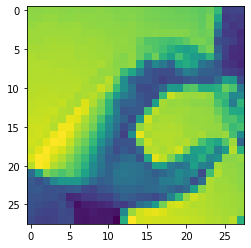

In [154]:
input_layer_size = 784
hidden_layer_size = 150      # hidden layer has 120 nodes excluding bias 
num_labels = 26              # 26 total output values: a=0, b=1, ... , z=25


np.random.seed(1999)
theta1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
theta2 = rand_initialize_weights(hidden_layer_size, num_labels)

print(f'theta1 shape: {np.shape(theta1)}, theta2 shape: {np.shape(theta2)}')

# supposed to be: : theta1 shape (120, 785), theta2 shape: (26, 121)
plt.imshow(X[3].reshape(28,28))

## Sigmoid function and derivative
* Used for activation function in forward propogation
* Derivative used for back propogation

In [155]:
def sigmoid(z):
   # return (1 / (1 + np.exp(-z)))
    s = expit(z)
    return s

def dx_sigmoid(z):
    res = sigmoid(z)
    return (res * (1 - res))

print(sigmoid(0))
print(dx_sigmoid(0))

0.5
0.25


In [156]:
# def return_labeled(y, num_labels):
#     '''returns (m,num_labels) matrix where each column corresoponds to an example
#     all indexes are 0, each column contains a single 1, the row corresponding to the answer'''
#     m = np.size(y)
#     out = np.zeros((num_labels, m), np.float32)
#     for i in range(0, m):
#         label = int(y[i])
#         out[label, i] = 1
#     return out


def return_labeled(y, num_labels):
    '''returns (m,num_labels) matrix where each column corresoponds to an example
    all indexes are 0, each column contains a single 1, the row corresponding to the answer'''
    m = np.size(y)
    out = np.zeros((m, num_labels), np.float32)
    for row in range(0, m):
        label = int(y[row])
        out[row, label] = 1
    return out

In [157]:
# def forward_backward(X,y):
#     print(f'X shape: {np.shape(X)}')
#     m = len(y)
#     # Forward propogation
# #     ones = np.ones((m,1))
# #     a1 = np.hstack((ones,X)) # m, input_layer + 1
# #     z2 = theta1.dot(a1.T) 
# #     a2 = np.c_[np.ones((X.shape[0],1)),sigmoid(z2.T)] 
# #     z3 = theta2.dot(a2.T) # 10x26 * 26x5000 = 26xm 
# #     a3 = sigmoid(z3)
#     a1 = np.c_[np.ones((m,1)), X]   # layer 1 : adding a bias column of 1's to X. (m, input_size + 1)
#     z2 = a1.dot(theta1.T)           # layer 2 matrix calculation
#     a2 = sigmoid(z2)                # activation of layer 2: shape(m, hidden_layer_size)
#     a2 = np.c_[np.ones((m, 1)), a2] # adding a bias column of 1's : shape(m, hidden_layer_size + 1)
#     z3 = a2.dot(theta2.T)           # layer3 || output layer calculation
#     a3 = sigmoid(z3)                # activation of output layer: size = (m, num_labels)
    
#     #Cost function
# #     inner_term0 = (-y_k * np.log(a3))
# #     inner_term1 = (1 - y_k) * np.log(1 - a3)
# #     left_side = np.sum(inner_term0 - inner_term1) / m
# #     right_side = np.sum(theta1[:, 1:] ** 2) + np.sum(theta2[:,1:] ** 2) # sum of all theta vals squred excluding theta index0 
# #     right_side = (lam / 2 / m) * right_side
# #     J = left_side + right_side
#     cost = -1*(1/m)*np.sum((np.log(a3.T)*(y_k)+np.log(1-a3).T*(1-y_k)))+(lam/(2*m))*(np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))
        

                           
#     # Back propogation
# #     delta3 = a3 - y_k
# #     delta2 = delta3.dot(theta2)[:,1:] * dx_sigmoid(z2) # excluding bias
# #     Gradient1 = (delta2.T).dot(a1)
# #     Gradient2 = (delta3.T).dot(a2)

#     d3 = a3.T - y_k # 5000x10
#     d2 = theta2[:,1:].T.dot(d3.T)*dx_sigmoid(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
    
#     delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
#     delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26
    
#     Theta1_ = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
#     Theta2_ = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
#     Gradient1 = delta1/m + (Theta1_*lam)/m
#     Gradient2 = delta2/m + (Theta2_*lam)/m
    
# #     print(f'Gradient 1: {Gradient1}')
# #     print(f'Gradient 2: {Gradient2}')

#     return a1, a2, a3, cost, Gradient1, Gradient2

In [243]:
# If this is still hitting the fan remove bias'

def forward_backward(theta1, theta2, X, y):
    labels = return_labeled(y, num_labels)
    m = len(y)
    # Feed forward propogation
    a1 = np.c_[np.ones((m,1)), X]   # layer 1 : adding a bias column of 1's to X. (m, input_size + 1)
    z2 = a1.dot(theta1.T)           # layer 2 matrix calculation
    a2 = sigmoid(z2)                # activation of layer 2: shape(m, hidden_layer_size)
    a2 = np.c_[np.ones((m, 1)), a2] # adding a bias column of 1's : shape(m, hidden_layer_size + 1)
    z3 = a2.dot(theta2.T)           # layer3 || output layer calculation
    a3 = sigmoid(z3)                # shape(m, num_labels)
    
    # Calculating cost (MSE)
    cost = ((1 / 2) * (np.power((a3 - labels), 2)))
    print(cost.sum())
    
    ################################################
    zh = z2
    ah = a2
    ao = a3
    zo = z3
    wo = theta1
    wo = theta2
    
    dcost_dao = ao - labels
    dao_dzo = dx_sigmoid(zo) 
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

    # Phase 2 =======================

    # dcost_w1 = dcost_dah * dah_dzh * dzh_dw1
    # dcost_dah = dcost_dzo * dzo_dah
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah)
    dah_dzh = dx_sigmoid(zh) 
    dzh_dwh = X

    # dzh_dwh & dah_dzh : (hidden layer size, input layer size)
    dcost_wh = dzh_dwh.T.dot( (dah_dzh * dcost_dah[:,1:]) )
#     # Back propogation loss
#     d3 = a3 - labels                    #dcost_dao
#     d3_dx = dx_sigmoid(a3)              #dao_dzo
#     dcost_wo = a2.T.dot(d3 * d3_dx)       #dcost_wo
#     # Back propogation gradients 
#     d2_cost = d3 * d3_dx                #dcost_dzo
#     # wo=theta2
#     dcost_dah = d2_cost.dot(theta2)
#     dah_dzh = dx_sigmoid(a2)
#     dcost_wh = labels.T.dot(dah_dzh * dcost_dah)
    
    return cost, dcost_wh.T, dcost_wo.T
    


In [244]:

learning_rate = 0.0001
batch_size = 120
lam = 3 # Lambda used for regularization in cost function


# reinitialize thetas
theta1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
theta2 = rand_initialize_weights(hidden_layer_size, num_labels)

losses, accuracies = [], []

# # Model training
epochs = 1000
mmm = 0
for i in (t := trange(epochs)):
    samp = np.random.randint(0, X.shape[0], size=(batch_size))
    X_train = X[samp]
    y_train = y[samp]
    
    cost, Gradient1, Gradient2 = forward_backward(theta1, theta2, X_train, y_train)
    
    print(f'grad1: {np.shape(Gradient1)}')
    print(f'grad2: {np.shape(Gradient2)}')

    
    theta1 = theta1[:,1:] - (learning_rate * Gradient1)
    theta2 = theta2 - (learning_rate * Gradient2)
    
    prediction = np.argmax(h_x, axis=1)
    
    loss = J.mean()
    losses.append(loss)

    accuracies.append(accuracy)
    t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

    
    

loss 4.37 accuracy 0.07: 100%|██████████| 1/1 [00:00<00:00, 194.66it/s]

391.53654516917425
grad1: (150, 784)
grad2: (26, 151)


In [235]:
# # # Model training
# epochs = 1000
# mmm = 0
# for i in (t := trange(epochs)):
#     samp = np.random.randint(0, X.shape[0], size=(batch_size))
#     X_train = X[samp]
#     y_train = y[samp]
    
#     for example in range(0, batch_size):
        
#         a1, a2, h_x, J, grad1, grad2 = forward_backward(theta1, theta2,X_train[example], y_train[example])
    
#         prediction = np.argmax(h_x, axis=1)
    
#         accuracy = (prediction == y_train).mean()
#         if (accuracy > mmm):
#             mmm = accuracy
    
#         theta1 -= (learning_rate * (grad1))
#         theta2 -= (learning_rate * (grad2))
    
#         loss = J.mean()
#         losses.append(loss)
    
#         accuracies.append(accuracy)
#     t.set_description("loss %.2f accuracy %.2f" % (loss, accuracy))

# print(f'max accuracy: {mmm}')